We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1. fitting it to the periodic function
2. plot the fit


Data


Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25


Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Min=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Max=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
month=np.arange(12)

In [7]:
month

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Text(0, 0.5, 'Min and max temperature')

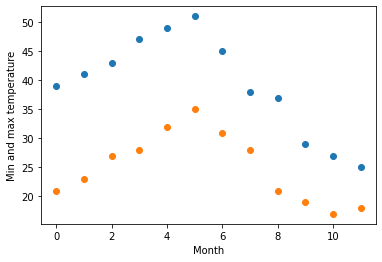

In [2]:
plt.scatter(month,Min)
plt.scatter(month,Max)
# plt.plot(month,Min)
# plt.plot(month,Max)
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [35]:
from numpy.random import randn
def func(x,a,b,c,d):
    return c+a*np.sin(b*x+d)

In [36]:
from scipy.optimize import curve_fit

#Perform the curve-fit
popt1, pcov1 = curve_fit(func,month,Min)
print(popt1)
popt2, pcov2 = curve_fit(func,month,Max)
print(popt2)


[12.18856801  0.40912741 36.75343844  6.26793415]
[-7.80370351  0.5454179  25.27219675  2.24099489]


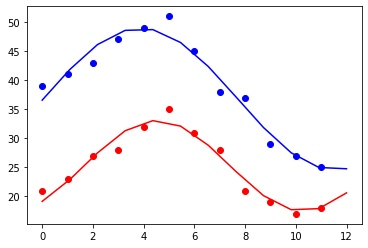

In [37]:
#Plot the fitted function
days = np.linspace(0, 12, num=12)

plt.figure()
plt.scatter(month,Min,marker='o',color='b')
plt.plot(days, func(days, *popt1), 'b')
plt.scatter(month,Max,marker='o',color='r')
plt.plot(days, func(days, *popt2), 'r')

## The above is solution 
## Rest part i have done for my analysis but it dint worked here it seems
### PS. i havent copy and pasted the online solution just created my solution .you can check

In [38]:
from lmfit import Model

gmodel=Model(func)
print("parameter name {}".format(gmodel.param_names))
print("parameter name {}".format(gmodel.independent_vars))

parameter name ['a', 'b', 'c', 'd']
parameter name ['x']


In [11]:
gmodel.make_params()

name,value,initial value,min,max,vary
a,-inf,None,-inf,inf,True
b,-inf,None,-inf,inf,True
c,-inf,None,-inf,inf,True


In [41]:
Min_eval= gmodel.eval(x=Min, a=1, b=1, c=22,d=6)
Max_eval= gmodel.eval(x=Max, a=1, b=1, c=22,d=2)

In [42]:
result1=gmodel.fit(Min,x=month,a=-1, b=1.8, c=35,d=6)
result2=gmodel.fit(Max,x=month,a=0, b=1.3, c=25,d=2)

In [43]:
print(result1.fit_report())

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 155
    # data points      = 12
    # variables        = 4
    chi-square         = 769.888929
    reduced chi-square = 96.2361161
    Akaike info crit   = 57.9360753
    Bayesian info crit = 59.8757019
[[Variables]]
    a: -2.59120172 +/- 4.12182848 (159.07%) (init = -1)
    b:  1.63366236 +/- 0.42243339 (25.86%) (init = 1.8)
    c:  39.2817765 +/- 2.84327502 (7.24%) (init = 35)
    d:  9.56886901 +/- 2.70500280 (28.27%) (init = 6)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, d) = -0.829


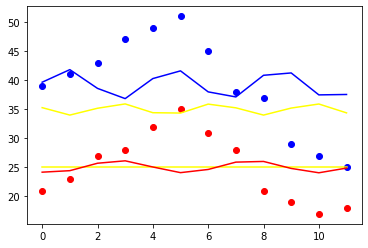

In [45]:
#Plot the fitted function
days = np.linspace(0, 12, num=12)

plt.figure()
plt.scatter(month,Min,marker='o',color='b')
plt.plot(month, result1.init_fit, 'yellow')
plt.plot(month, result1.best_fit, 'b')
plt.scatter(month,Max,marker='o',color='r')
plt.plot(month, result2.init_fit, 'yellow')
plt.plot(month, result2.best_fit, 'red')


## Q2.This assignment is for visualization using matplotlib:
    
data to use:
    
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
    
titanic = pd.read_csv(url)

Charts to plot:
    
1. Create a pie chart presenting the male/female proportion

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [46]:
import pandas as pd
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
df=pd.read_csv(url)

In [47]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


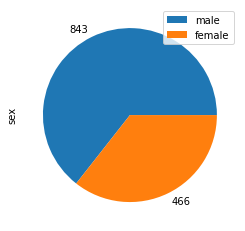

In [61]:
#Create a pie chart presenting the male/female proportion
df["sex"].value_counts().plot.pie(labels=df["sex"].value_counts())
plt.legend(df["sex"].value_counts().index)

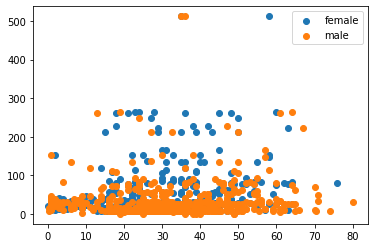

In [78]:
# **Create a scatterplot with the Fare paid and the Age, differ the plot color by gender**
fig,ax=plt.subplots()
groups=df.groupby("sex")
#groups.fare.max()

for name,group in groups:
    ax.scatter(group.age,group.fare,label=name)
ax.legend()